In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#install rake nltk nlp processing package
!pip install rake_nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
new_directory = 'raw_data'
!mkdir $new_directory

!cd $new_directory && \
    wget --tries=3 http://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Grocery_and_Gourmet_Food.json.gz && \
    wget --tries=3 http://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Grocery_and_Gourmet_Food.json.gz


mkdir: cannot create directory ‘raw_data’: File exists
--2023-02-27 02:50:17--  http://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Grocery_and_Gourmet_Food.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 586910426 (560M) [application/x-gzip]
Saving to: ‘Grocery_and_Gourmet_Food.json.gz.1’

Grocery_and_Gourmet 100%[===================>] 559.72M  74.5MB/s    in 7.9s    

2023-02-27 02:50:25 (70.7 MB/s) - ‘Grocery_and_Gourmet_Food.json.gz.1’ saved [586910426/586910426]

--2023-02-27 02:50:25--  http://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Grocery_and_Gourmet_Food.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109586529 (105M) [application/x-gzip]
S

In [ ]:
#importing libraries and dependencies
#importing python essentials
import pandas as pd
import numpy as np

#importing nltk library for nlp processing
from rake_nltk import Rake
import nltk

#download stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#importing machine learning libraies from skleard
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
pd.set_option("max_colwidth", None)

#importing datasets
#metadata from Amazon grocery and gourmet food
grocery_meta_data = pd.read_json(new_directory + '/meta_Grocery_and_Gourmet_Food.json.gz', lines=True, compression='infer')
#sample head of the data
grocery_meta_data.head()
#asin is unique to product in amazon
grocery_meta_data = grocery_meta_data.drop_duplicates(subset='asin', keep="first")


In [ ]:
grocery_meta_data['category_in_string'] = ''

#converting category list to string
for index, row in grocery_meta_data.iterrows():
  cat_string = ''
  cat_string = ''.join(row['category'])
  grocery_meta_data.at[index, 'category_in_string'] = cat_string

allCategories = grocery_meta_data['category_in_string']

#unique category list
distict_categories = set(allCategories)

fresh_produce_categories = []

for distinct_category in distict_categories:
  #find fresh product categories
  if distinct_category.find('FoodProduceFresh') != -1:
    fresh_produce_categories.append(distinct_category)

#filter all fresh produce data
filtered_grocery_meta = grocery_meta_data.loc[grocery_meta_data['category_in_string'].isin(fresh_produce_categories)]
#sample head of the the filtered fresh produce data
filtered_grocery_meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,category_in_string
24,"[Grocery & Gourmet Food, Produce, Fresh Vegetables, Mushrooms & Truffles, Black Truffles]",,"[dried truffle slices, wild black winter truffle, good for health., We refuse any return and refund request after buyer receives the purchased item, because some buyers viciously play the trick of return and refund, for shame! Packing maybe different from the photo showing, but products is the same, please be noted. All products comes from Himalayas mushroom heaven in China. Our Mission is to preach gospel to all people living in Yunnan mountain regions. All mushroom truffle and tea come from these regions, so when you buy it, you are supporting our preaching missionary, you are helping church mission, God remember your help, God bless you!, Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.]",,Dried Truffle Slices Premium Grade 185 Gram,[],,Himalayas Mushroom & Truffles,[],"1,228,657 in Grocery & Gourmet Food (",[B00R5W11WC],Grocery,,,$107.99,7107272160,"[https://images-na.ssl-images-amazon.com/images/I/51W30K45%2BrL._SS40_.jpg, https://images-na.ssl-images-amazon.com/images/I/51HuTLXdCBL._SS40_.jpg]","[https://images-na.ssl-images-amazon.com/images/I/51W30K45%2BrL.jpg, https://images-na.ssl-images-amazon.com/images/I/51HuTLXdCBL.jpg]",{'ASIN: ': '7107272160'},Grocery & Gourmet FoodProduceFresh VegetablesMushrooms & TrufflesBlack Truffles
25,"[Grocery & Gourmet Food, Produce, Fresh Vegetables, Mushrooms & Truffles, Straw]",,"[dried champignon mushroom, the cut slices, natural mushroom, good for health., We refuse any return and refund request after buyer receives the purchased item, because some buyers viciously play the trick of return and refund, for shame! Packing maybe different from the photo showing, but products is the same, please be noted. All products comes from Himalayas mushroom heaven in China. Our Mission is to preach gospel to all people living in Yunnan mountain regions. All mushroom truffle and tea come from these regions, so when you buy it, you are supporting our preaching missionary, you are helping church mission, God remember your help, God bless you!, Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.]",,Champignon Dried Mushroom Premium Grade 310 Gram,[],,Himalayas Mushroom & Truffles,[],"997,346 in Grocery & Gourmet Food (",[],Grocery,,,$52.99,7531848279,"[https://images-na.ssl-images-amazon.com/images/I/51URDug2gvL._SS40_.jpg, https://images-na.ssl-images-amazon.com/images/I/512jxKSXcdL._SS40_.jpg]","[https://images-na.ssl-images-amazon.com/images/I/51URDug2gvL.jpg, https://images-na.ssl-images-amazon.com/images/I/512jxKSXcdL.jpg]",{'ASIN: ': '7531848279'},Grocery & Gourmet FoodProduceFresh VegetablesMushrooms & TrufflesStraw
212,"[Grocery & Gourmet Food, Produce, Fresh Vegetables, Mushrooms & Truffles, Black Truffles]",,"[Also known as cloud ear, tree ear or silver ear . They have a slightly crunchy texture and delicate, almost bland flavor that more often than not absorbs the taste of the more strongly flavored ingredients with which they are cooked., Black fungus., Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.]",,Dried Black Fungus,[],,Unknown,[],"459,222 in Grocery & Gourmet Food (","[B0009OA17Y, B071WX354Y, B079FJ4H7M, B079FGVB2M, B00KHKBD68, B0776V1LKN, B01DVUT8HG, B000RHXMCY, B079FFQVBF, B007RAM7AC, B00ADHM9WW, B005VJQNL0, B004RZ0U36, B00Q9HF9NG, B00H57XXAU, B00BUIKGU0, B076TGX1HT, B00D7N43UA]",Grocery,,,,B0000CNU07,[],[],"{'Shipping Weight:': '2.4 ounces', 'ASIN: ': 'B0000CNU07'}",G

In [ ]:
#filter columns, only essential columns will be taken in to concideration 
filtered_meta_with_essential_col = filtered_grocery_meta[['category', 'description', 'title', 'brand', 'price', 'asin', 'details']]
filtered_meta_with_essential_col.head()



,category,description,title,brand,price,asin,details
24,"[Grocery & Gourmet Food, Produce, Fresh Vegetables, Mushrooms & Truffles, Black Truffles]","[dried truffle slices, wild black winter truffle, good for health., We refuse any return and refund request after buyer receives the purchased item, because some buyers viciously play the trick of return and refund, for shame! Packing maybe different from the photo showing, but products is the same, please be noted. All products comes from Himalayas mushroom heaven in China. Our Mission is to preach gospel to all people living in Yunnan mountain regions. All mushroom truffle and tea come from these regions, so when you buy it, you are supporting our preaching missionary, you are helping church mission, God remember your help, God bless you!, Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.]",Dried Truffle Slices Premium Grade 185 Gram,Himalayas Mushroom & Truffles,$107.99,7107272160,{'ASIN: ': '7107272160'}
25,"[Grocery & Gourmet Food, Produce, Fresh Vegetables, Mushrooms & Truffles, Straw]","[dried champignon mushroom, the cut slices, natural mushroom, good for health., We refuse any return and refund request after buyer receives the purchased item, because some buyers viciously play the trick of return and refund, for shame! Packing maybe different from the photo showing, but products is the same, please be noted. All products comes from Himalayas mushroom heaven in China. Our Mission is to preach gospel to all people living in Yunnan mountain regions. All mushroom truffle and tea come from these regions, so when you buy it, you are supporting our preaching missionary, you are helping church mission, God remember your help, God bless you!, Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.]",Champignon Dried Mushroom Premium Grade 310 Gram,Himalayas Mushroom & Truffles,$52.99,7531848279,{'ASIN: ': '7531848279'}
212,"[Grocery & Gourmet Food, Produce, Fresh Vegetables, Mushrooms & Truffles, Black Truffles]","[Also known as cloud ear, tree ear or silver ear . They have a slightly crunchy texture and delicate, almost bland flavor that more often than not absorbs the taste of the more strongly flavored ingredients with which they are cooked., Black fungus., Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.]",Dried Black Fungus,Unknown,,B0000CNU07,"{'Shipping Weight:': '2.4 ounces', 'ASIN: ': 'B0000CNU07'}"
215,"[Grocery & Gourmet Food, Produce, Fresh Vegetables, Mushrooms & Truffles]","[Reconstitute the shiitakes by soaking them in warm water for approximately 30 minutes. Remove from water, squeeze excess liquid from shiitake. Remove and discard shiitake stems. Leave shiitake whole, thinly sliced, chopped or diced as desired., dried mushrooms., Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.]",Dried Shiitake Mushrooms,Unknown,,B0000CNU01,"{' Item Weight: ': '8 ounces', 'Shipping Weight:': '2 pounds', 'ASIN: ': 'B0000CNU01'}"
319,"[Grocery & Gourmet Food, Produce, Fresh Vegetables]","[Small green peppers stuffed with rice, vegetables, and spices; cooked in tomato sauce., Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.]","SULTAN PEPPER SFTD, 14 OZ",Ziyad,,B0000D16GI,"{' Product Dimensions: ': '1 x 1 x 1 inches ; 1 pounds', 'Shipping Weight:': '2 pounds', 'ASIN: ': 'B0000D16GI', 'UPC:': '074265002871'}"


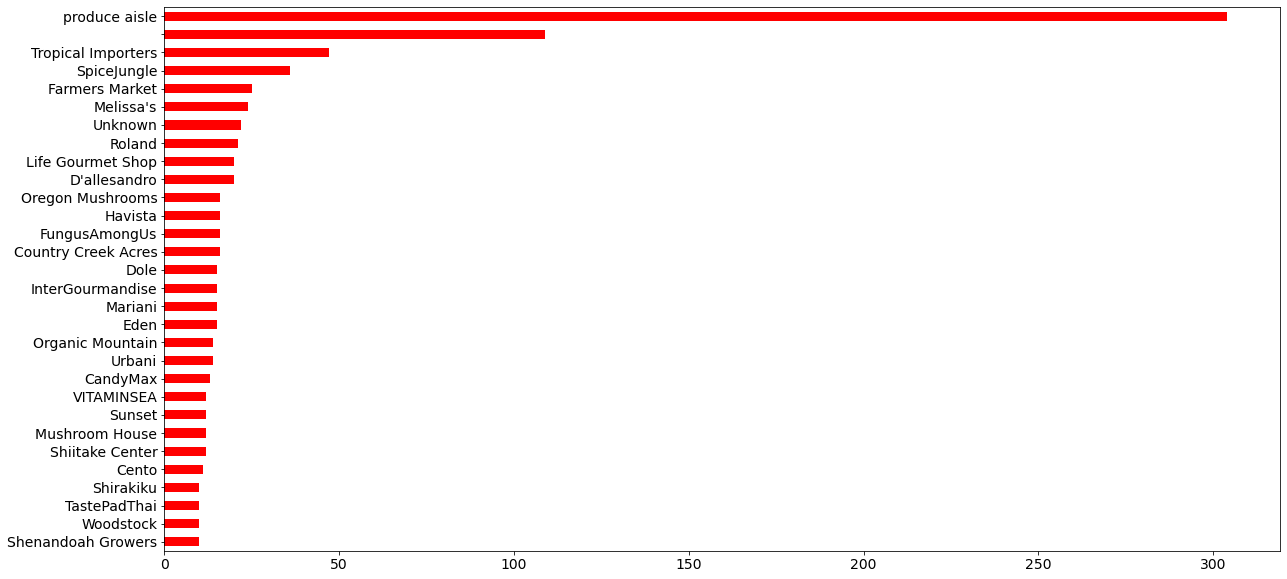

In [ ]:
#explore data, by brand, since in our proposed system will be supplier focused as well
#only first 30 records will be taken for the analysis
filtered_meta_with_essential_col['brand'].value_counts()[0:30].plot(kind='barh', figsize=[20,10], fontsize=14, color='red').invert_yaxis()


<ipython-input-46-9b85ca523485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_meta_with_essential_col["brand"] = filtered_meta_with_essential_col["brand"].replace(r'^\s*$', 'Unknown', regex=True)


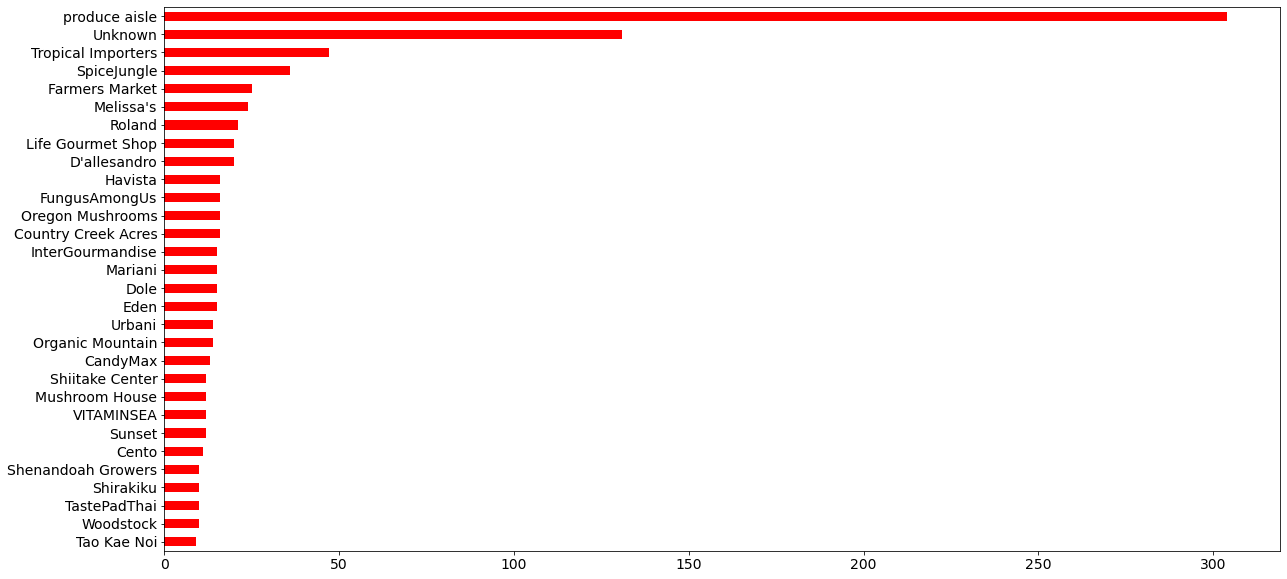

In [ ]:
#There are some data without a brand - replace it with Unknown
filtered_meta_with_essential_col["brand"] = filtered_meta_with_essential_col["brand"].replace(r'^\s*$', 'Unknown', regex=True)
filtered_meta_with_essential_col['brand'].value_counts()[0:30].plot(kind='barh', figsize=[20,10], fontsize=14, color='red').invert_yaxis()

In [ ]:
#resetting the index of the filtered table
filtered_meta_with_essential_col = filtered_meta_with_essential_col.reset_index()

In [ ]:
#creating a bag of words using the features
#first identify keywords from description
#new keywords column to be created

filtered_meta_with_essential_col['keywords'] = ''

In [ ]:
#rake function is called
#RAKE is rapid keyword extraction algorithm
rake = Rake()
for index, row in filtered_meta_with_essential_col.iterrows():
    
    rake.extract_keywords_from_text(text=row['title'])
    key_words_dict_scores_for_name = rake.get_word_degrees()
    keywords_for_title = list(key_words_dict_scores_for_name.keys())

    rake.extract_keywords_from_text(text=''.join(row['description']))
    key_words_dict_scores_for_description = rake.get_word_degrees()
    keywords_for_desc = list(key_words_dict_scores_for_description.keys())

    filtered_meta_with_essential_col.at[index, 'keywords'] = keywords_for_title + keywords_for_desc

In [ ]:
#sample peek of keyword extaction
print(filtered_meta_with_essential_col.at[0,'keywords'])


['dried', 'truffle', 'slices', 'premium', 'grade', '185', 'gram', 'dried', 'truffle', 'slices', 'wild', 'black', 'winter', 'good', 'health', 'refuse', 'return', 'refund', 'request', 'buyer', 'receives', 'purchased', 'item', 'buyers', 'viciously', 'play', 'trick', 'shame', 'packing', 'maybe', 'different', 'photo', 'showing', 'products', 'please', 'noted', 'comes', 'himalayas', 'mushroom', 'heaven', 'china', 'mission', 'preach', 'gospel', 'people', 'living', 'yunnan', 'mountain', 'regions', 'tea', 'come', 'buy', 'supporting', 'preaching', 'missionary', 'helping', 'church', 'god', 'remember', 'help', 'bless', 'statements', 'regarding', 'dietary', 'supplements', 'evaluated', 'fda', 'intended', 'diagnose', 'treat', 'cure', 'prevent', 'disease', 'condition']


In [ ]:
#next step is to create bag of words for each column
#this will contain keywords catgories and brand
filtered_meta_with_essential_col['bag_of_words'] = ''

In [ ]:
for index, row in filtered_meta_with_essential_col.iterrows():
    aggerated_words = ''
    aggerated_words += ''.join(filtered_meta_with_essential_col.at[index, 'category']) + ' '
    aggerated_words += ''.join(filtered_meta_with_essential_col.at[index, 'brand']) + ' '
    aggerated_words += ' '.join(filtered_meta_with_essential_col.at[index, 'keywords']) + ' '

    filtered_meta_with_essential_col.at[index,'bag_of_words'] = aggerated_words

In [ ]:
print(filtered_meta_with_essential_col.at[1500,'title'])

Dried Cranberries 5 Pound Bag Strawberry Flavor - Oh! Nuts


In [ ]:
#Creating a seperate table for train
#This will only contain name and bag of words
meta_data_to_train = filtered_meta_with_essential_col[['title','bag_of_words']]
print(meta_data_to_train.head())

                                              title  \
0       Dried Truffle Slices Premium Grade 185 Gram   
1  Champignon Dried Mushroom Premium Grade 310 Gram   
2                                Dried Black Fungus   
3                          Dried Shiitake Mushrooms   
4                         SULTAN PEPPER SFTD, 14 OZ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  bag_of_words  
0   Grocery 

In [ ]:
#next - creating the simmilartity matrix
#using tfidf - this will convert words to frequencies

vector_model = TfidfVectorizer(max_df=0.4,         
                              min_df=1,      
                              stop_words='english',
                              lowercase=True, 
                              use_idf=True,   
                              norm=u'l2',     
                              smooth_idf=True 
                               )

#fitting the model to vectorize the bag of words data
tfidf_vec_matrix = vector_model.fit_transform(meta_data_to_train['bag_of_words'])

In [ ]:
#there are two effient ways to cluster the data 
#1. Use the cosine simmilarities
#2. Use euclidean K-means clustering
#using cosine simmilarities is more efficient
cosine_simmilarities_vector = cosine_similarity(tfidf_vec_matrix, tfidf_vec_matrix)
#creating a 2d array to map simmilar groups
cosine_simmilarities_vector

array([[1.        , 0.89741529, 0.06064624, ..., 0.00713659, 0.        ,
        0.        ],
       [0.89741529, 1.        , 0.02177895, ..., 0.00700203, 0.        ,
        0.        ],
       [0.06064624, 0.02177895, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00713659, 0.00700203, 0.        , ..., 1.        , 0.1984824 ,
        0.20762068],
       [0.        , 0.        , 0.        , ..., 0.1984824 , 1.        ,
        0.17683645],
       [0.        , 0.        , 0.        , ..., 0.20762068, 0.17683645,
        1.        ]])

In [ ]:
#creating new indexes for the matrix

indexes = pd.Series(meta_data_to_train['title']) 

In [ ]:
def generate_recommendations_from_matrix(item_title, cosine_sim_matrix = cosine_simmilarities_vector):
  recommended_products = []
  index_of_item = indexes[indexes == item_title].index[0]
  #generate the simmilarity score series, ascending order
  score_series = pd.Series(cosine_sim_matrix[index_of_item]).sort_values(ascending = False)
  best_related_indexes = list(score_series.iloc[1:11].index)
  #collect related products titles ? should be modified in future to get the product object
  for i in best_related_indexes:
    recommended_products.append(list(meta_data_to_train['title'])[i])
  return recommended_products

In [ ]:
generate_recommendations_from_matrix('Dried Cranberries 5 Pound Bag Strawberry Flavor - Oh! Nuts')

['Dried Cranberries Craisins 2 Pound Bag - Oh! Nuts',
 'Mango Slices Dried, A Delicious Chewy Healthy Mango Snack - Oh! Nuts (2 Pound Bag)',
 'Craisins Dried Cranberries Pomegranate Juice Infused (PACK OF 2)',
 'Ocean Spray Craisins With Pomegranate - 32oz Bag',
 'Ocean Spray Craisins, Orange, 6-Ounce Bags (Pack of 12)',
 'Ocean Spray 29516 Craisins, Original Cranberry, 1 oz Box, 6/Pack',
 'Ocean Spray Fresh Premium Cranberries, 12 oz package',
 'Ocean Spray 6-oz. Cherry Craisins (Dried Cranberries), - 1 Pack',
 'Ocean Spray 22465 Craisins Fruit Clusters Cranberry Granola 1.413 oz 10/Box',
 "Newman's Own Organics Cranberries Stand-up Zip Bag, 4 Ounce Bag (Pack of 6)"]

In [ ]:
def get_product_by_name(item_title):
  return filtered_meta_with_essential_col.loc[filtered_meta_with_essential_col['title'] == item_title]

In [ ]:
bag_of_words1 = get_product_by_name('Ocean Spray 22465 Craisins Fruit Clusters Cranberry Granola 1.413 oz 10/Box')
bag_of_words2 = get_product_by_name('Craisins Dried Cranberries Pomegranate Juice Infused (PACK OF 2)')
wrd1 = bag_of_words1['bag_of_words'].to_string()
wrd2 = bag_of_words2['bag_of_words'].to_string()

# print(wrd1)
# print(wrd2)

# # common = wrd1 & wrd2

# # # print((common))


common = set(wrd1.split()).intersection( set(wrd2.split()) )
# unique = set(wrd1.split()).symmetric_difference( set(wrd2.split()) )

# # unique = set(wrd1).symmetric_difference(set(wrd2) )
print(common)
# # print(unique)

# #rake function is called






{'craisins', 'cranberries', 'pack', 'Spray', '&', 'Grocery', 'Ocean', 'Gourmet', 'Fruits', 'dried', 'FoodProduceFresh'}
